In [2]:
import math 
import string 
import sys 
import os
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
# reading the text file 
# This functio will return a 
# list of the lines of text 
# in the file. 
def read_file(filename): 
	
	try: 
		with open(filename, 'r') as f: 
			data = f.read() 
		return data 
	
	except IOError: 
		print("Error opening or reading input file: ", filename) 
		sys.exit() 

# splitting the text lines into words 
# translation table is a global variable 
# mapping upper case to lower case and 
# punctuation to spaces 
translation_table = str.maketrans(string.punctuation+string.ascii_uppercase, 
									" "*len(string.punctuation)+string.ascii_lowercase) 
	
# returns a list of the words 
# in the file 
def get_words_from_line_list(text): 
	
	text = text.translate(translation_table) 
	word_list = text.split() 
	word_list = ' '.join([i for i in text.split() if not i.isdigit()])
	#word_list = word_list.split()
	return word_list 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vasconsellosolliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/vasconsellosolliveira/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vasconsellosolliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# counts frequency of each word 
# returns a dictionary which maps 
# the words to their frequency. 
def count_frequency(word_list): 
	
	D = {} 
	
	for new_word in word_list: 
		
		if new_word in D: 
			D[new_word] = D[new_word] + 1
			
		else: 
			D[new_word] = 1
			
	return D 

# returns dictionary of (word, frequency) 
# pairs from the previous dictionary. 
def word_frequencies_for_file(filename): 
	
	line_list = read_file(filename) 
	word_list = get_words_from_line_list(line_list) 
	freq_mapping = count_frequency(word_list) 

	print("File", filename, ":", ) 
	print(len(line_list), "lines, ", ) 
	print(len(word_list), "words, ", ) 
	print(len(freq_mapping), "distinct words") 

	return freq_mapping 



In [4]:
# returns the dot product of two documents 
def dotProduct(D1, D2): 
	Sum = 0.0
	
	for key in D1: 
		
		if key in D2: 
			Sum += (D1[key] * D2[key]) 
			
	return Sum

# returns the angle in radians 
# between document vectors 
def vector_angle(D1, D2): 
	numerator = dotProduct(D1, D2) 
	denominator = math.sqrt(dotProduct(D1, D1)*dotProduct(D2, D2)) 
	
	return math.acos(numerator / denominator) 



In [5]:
def documentSimilarity(filename_1, filename_2): 
	
# filename_1 = sys.argv[1] 
# filename_2 = sys.argv[2] 
	sorted_word_list_1 = word_frequencies_for_file(filename_1) 
	sorted_word_list_2 = word_frequencies_for_file(filename_2) 
	distance = vector_angle(sorted_word_list_1, sorted_word_list_2)
	print("The distance between the documents is: % 0.6f (radians)"% distance) 



In [6]:
filename_1 = "/Users/vasconsellosolliveira/Documents/Formação/Master Sciences de Données et Big Data/Semestre 3/Social network analysis/SNA/css_naked_day_readme.md"
filename_2 = "/Users/vasconsellosolliveira/Documents/Formação/Master Sciences de Données et Big Data/Semestre 3/Social network analysis/SNA/grit_readme.md"
documentSimilarity(filename_1,filename_2)

Error opening or reading input file:  /Users/vasconsellosolliveira/Documents/Formação/Master Sciences de Données et Big Data/Semestre 3/Social network analysis/SNA/css_naked_day_readme.md


SystemExit: 

/Users/vasconsellosolliveira/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:

def get_docs(directory):
    docs =[] 
    stop_words = set(stopwords.words('english'))
    files = []
    for filename in os.listdir(directory):
        if filename.endswith(".md"):
            sent = " ".join(w for w in nltk.wordpunct_tokenize(get_words_from_line_list(read_file(directory+filename))) if w.lower() in stop_words or w.isalpha()) 
            files.append(filename)
            word_tokens = word_tokenize(sent) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words] 
            filtered_sentence = [] 
            sentence = str()
            for w in word_tokens: 
                if w not in stop_words: 
                    filtered_sentence.append(w)
                    sentence+="".join(w+" ")
            docs.append(sentence)
    return docs, files

In [33]:
count_vectorizer = CountVectorizer(stop_words='english')
#for i in range(len(docs)): 
def docs2dataframe(docs, files):
    sparse_matrix=count_vectorizer.fit_transform(docs)
    doc_term_matrix = sparse_matrix.todense()
    if type(files) is not type(None):
        df = pd.DataFrame(doc_term_matrix,columns=count_vectorizer.get_feature_names(),
                  index=files)
    else:
        df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
        count_vectorizer.get_feature_names()
    return df

directory = "/Users/vasconsellosolliveira/Documents/Formação/Master Sciences de Données et Big Data/Semestre 3/Social network analysis/SNA/files/"
docs, files = get_docs(directory)
df = docs2dataframe(docs, files)
df

,abhay,ability,able,acceptable,accepts,access,accessible,accidental,accomplished,account,...,xmlns,xmlsoft,xslt,yaml,years,yetanother,yml,yourdbhere,zed,zentest
calendar_builder.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bmhsearch.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ambitious-sphinx.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acts_as_money.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blerb-core.md,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,4,1,0,0
bus-scheme.md,0,0,1,0,0,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
ambitious_activeldap.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
capsize.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
calais.md,1,1,0,0,1,1,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
awesomeness.md,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.metrics.pairwise import cosine_similarity


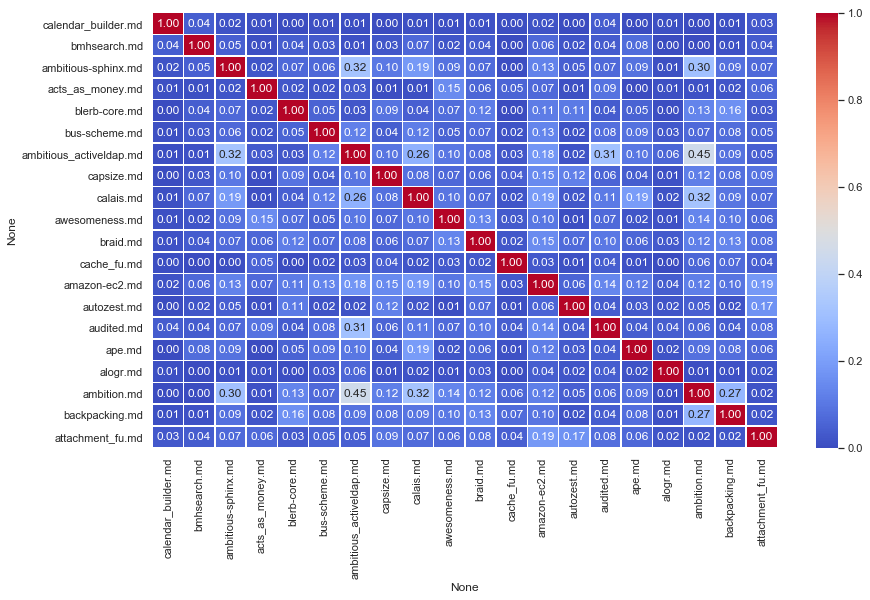

In [41]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(rc={'figure.figsize':(14,8)})
cos_sim = cosine_similarity(df, df)
cos_sim = pd.DataFrame(cos_sim, columns= [files], index = [files])
fig=sb.heatmap(cos_sim, annot = True, cmap ="coolwarm", fmt='0.2f', linewidth=0.5);

In [46]:
fig.figure.savefig("output.png")